# Report

#### Preprocessing Phase:
1. After importing the dataset, I realized that the data was not stored properly , so firstly i had to create a dataframe using pandas and then i had to typecast some features from string type to integer type. \n
2. next , I checked for outliers in every feature .\n
3. To do this , I used boxplot , which is  a popular visualization technique to find outliers.\n
4. outliers found in age, campaign, balance, pdays, and previous features. so , I removed the outliers.\n
5. next I did the conversion of categorical features like month, education , etc . into numeric or binary features. this was done so that it would  make it easier to fit the model .\n
6. Lastly, I converted the negative values to zero(0).

#### Modelling Phase:
1. for this i have used logistic regression and random forest classification \n
2. firstly , i divided the preprocessed dataset into 'X' set and 'Y' set \n
3. I then used train test split to split X and Y into , X_train, x_test, y_train, y_test \n
4. i did the standard scalar preprocessing for X_train and y_train since we are checking probablity in logistic regression . \n
5. i fit the model with standard scalar data , and then predicted y for x_test \n
6. for random forest I fit X_train, y_train into the model and predicted y for x_test \n

####      evaluation:
1. for both logistic regression and random forest classifier have used confusion matrix and accuracy score for evaluation \n
2. confusion matrix for logistic regression : \n
[[961  18]   \n
[106  34]] \n
3. confusion matrix for random forest: \n
 [[955  24] \n
 [ 98  42]] \n
4. oob score for random forest is :0.9036970781156828
\n
#### result
 1. logistic regression is 88.91 % accurate model \n
 2. random forest classifier is 89.09% accurate model \n

# code and output

## import libraries and dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import the dataset
df_bank = pd.read_csv("bank.csv")
df_bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


### dataset not in right for 1st create a dataframe with the data

In [3]:
df_bank.columns 

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [4]:
l1 = str(df_bank.columns)
l1= l1.split(';')
l=[]
for i in l1:
    i = i.split('"')
    
    
    for j in i:
        
        if j == '"':
            i.remove(j)
    
    i= "".join(i)
        
    l.append(i)
        

l1=l
l= l1[0].split("'")
l1[0]=l[1]
l1

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 "y'], dtype='object')"]

In [5]:
l1[-1]='y'
l1

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [6]:
df_bank.shape

(4521, 1)

In [7]:
l=[]
i=0
while i<4521:
    l.append(list(df_bank.loc[i]))
    i+=1
print(l)

[['30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"'], ['33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"no"'], ['35;"management";"single";"tertiary";"no";1350;"yes";"no";"cellular";16;"apr";185;1;330;1;"failure";"no"'], ['30;"management";"married";"tertiary";"no";1476;"yes";"yes";"unknown";3;"jun";199;4;-1;0;"unknown";"no"'], ['59;"blue-collar";"married";"secondary";"no";0;"yes";"no";"unknown";5;"may";226;1;-1;0;"unknown";"no"'], ['35;"management";"single";"tertiary";"no";747;"no";"no";"cellular";23;"feb";141;2;176;3;"failure";"no"'], ['36;"self-employed";"married";"tertiary";"no";307;"yes";"no";"cellular";14;"may";341;1;330;2;"other";"no"'], ['39;"technician";"married";"secondary";"no";147;"yes";"no";"cellular";6;"may";151;2;-1;0;"unknown";"no"'], ['41;"entrepreneur";"married";"tertiary";"no";221;"yes";"no";"unknown";14;"may";57;2;-1;0;"unknown";"no"'], ['43;"services";"married";"

In [8]:
s=str(l[0]).split(";")

temp = []
for lst in l:
    for item in lst:
        item = item.split(";")
        t=[]
        for j in item:
            j = j.split('"')
            
            for x in j[1:]:
                if x == '':
                    j.remove(x)
            j = "".join(j)
            t.append(j)
        item = t
        temp.append(item)

l = temp
print(l)




[['30', 'unemployed', 'married', 'primary', 'no', '1787', 'no', 'no', 'cellular', '19', 'oct', '79', '1', '-1', '0', 'unknown', 'no'], ['33', 'services', 'married', 'secondary', 'no', '4789', 'yes', 'yes', 'cellular', '11', 'may', '220', '1', '339', '4', 'failure', 'no'], ['35', 'management', 'single', 'tertiary', 'no', '1350', 'yes', 'no', 'cellular', '16', 'apr', '185', '1', '330', '1', 'failure', 'no'], ['30', 'management', 'married', 'tertiary', 'no', '1476', 'yes', 'yes', 'unknown', '3', 'jun', '199', '4', '-1', '0', 'unknown', 'no'], ['59', 'blue-collar', 'married', 'secondary', 'no', '0', 'yes', 'no', 'unknown', '5', 'may', '226', '1', '-1', '0', 'unknown', 'no'], ['35', 'management', 'single', 'tertiary', 'no', '747', 'no', 'no', 'cellular', '23', 'feb', '141', '2', '176', '3', 'failure', 'no'], ['36', 'self-employed', 'married', 'tertiary', 'no', '307', 'yes', 'no', 'cellular', '14', 'may', '341', '1', '330', '2', 'other', 'no'], ['39', 'technician', 'married', 'secondary', 'n

### correct format achieved

In [9]:
df_bank = pd.DataFrame(data = l , columns = l1)
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### dataset does not contain null values

In [11]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df_bank.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


### typecast string to integer values

In [13]:
age = [int(i) for i in df_bank['age']]
balance = [int(i) for i in df_bank['balance']]
day = [int(i) for i in df_bank['day']]
duration = [int(i) for i in df_bank['duration']]
campaign = [int(i) for i in df_bank['campaign']]
pdays = [int(i) for i in df_bank['pdays']]
previous = [int(i) for i in df_bank['previous']]


In [14]:
df_bank['age']  =  age
df_bank['balance'] = balance
df_bank['day'] = day
df_bank['duration'] = duration
df_bank['campaign'] = campaign
df_bank['pdays'] = pdays
df_bank['previous'] = previous

In [15]:
type(df_bank['age'][2])

numpy.int64

In [16]:
df_bank['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

### check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2752f835400>,
 'caps': [<matplotlib.lines.Line2D at 0x2752f835a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2752f835130>,
 'medians': [<matplotlib.lines.Line2D at 0x2752f835f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x2752f842250>,
 'means': []}

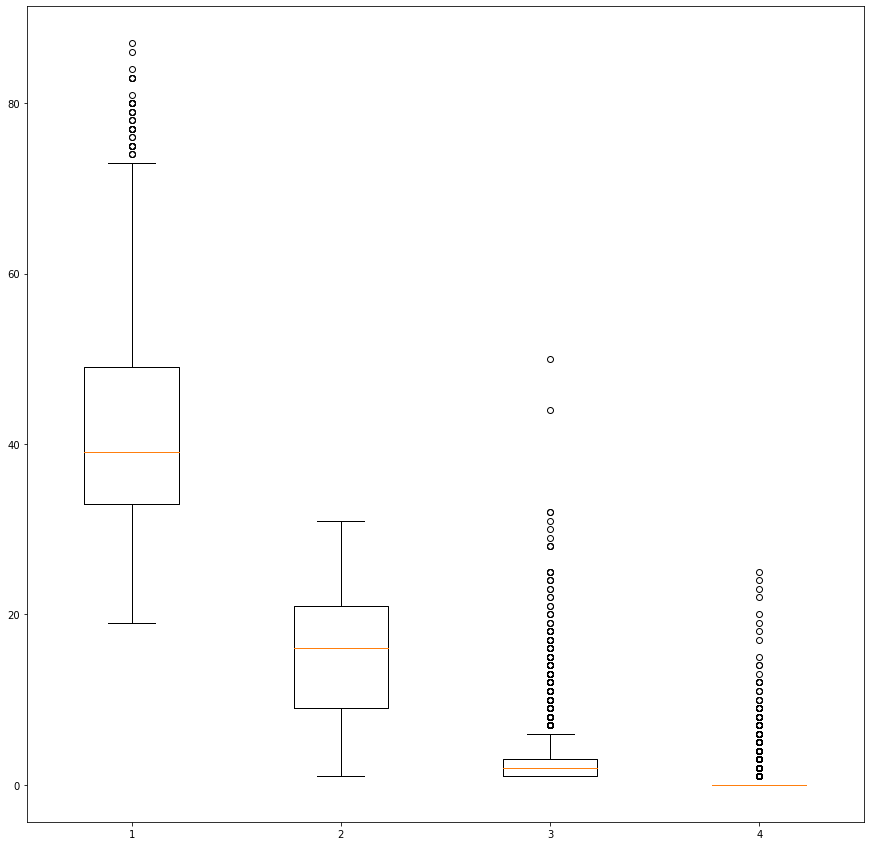

In [17]:
data = [age, day , campaign  , previous ]
plt.figure(figsize=(15,15))
plt.boxplot(data)


{'whiskers': [<matplotlib.lines.Line2D at 0x2752f8cbd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2752f8da2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2752f8cba30>],
 'medians': [<matplotlib.lines.Line2D at 0x2752f8da880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2752f8dab50>],
 'means': []}

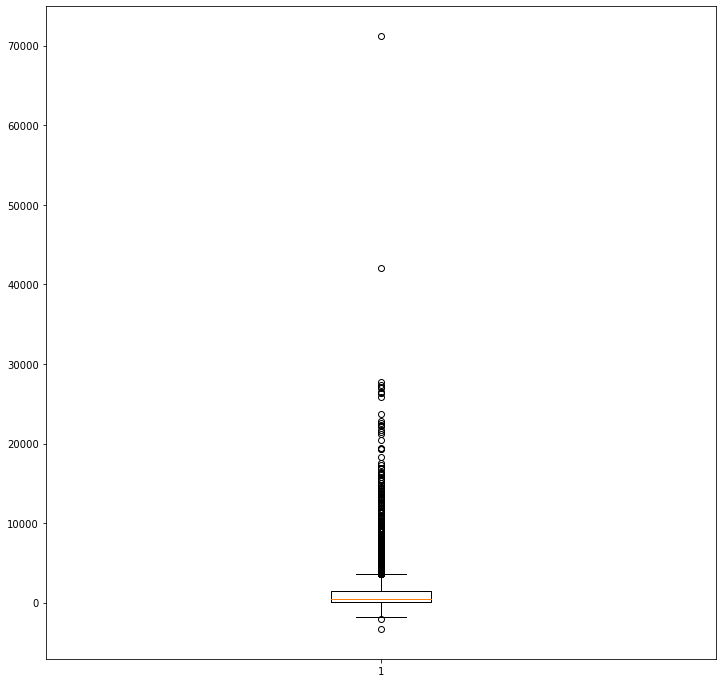

In [18]:
plt.figure(figsize=(12,12))
plt.boxplot(balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x2752f907040>,
 'caps': [<matplotlib.lines.Line2D at 0x2752f9075e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2752f8f9d30>],
 'medians': [<matplotlib.lines.Line2D at 0x2752f907b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2752f907e50>],
 'means': []}

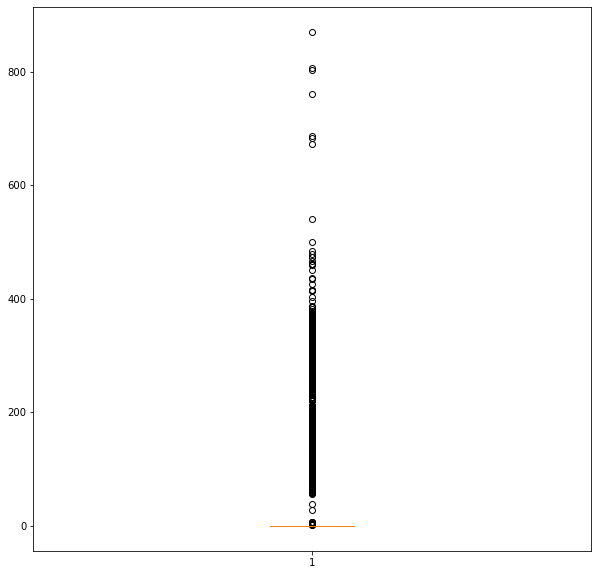

In [19]:
plt.figure(figsize=(10,10))
plt.boxplot(pdays)

In [20]:
df_bank.shape

(4521, 17)

In [21]:
df1 = df_bank

### Remove outliers

In [22]:
df_bal = df1[df1['balance']>30000].index
df1.drop(df_bal,inplace = True)

In [23]:
df1.shape

(4519, 17)

In [24]:
df_outliers = df1[df1['pdays']>500 ].index
df1.drop(df_outliers, inplace = True)
df_outliers = df1[ df1['previous']>20 ].index
df1.drop(df_outliers, inplace = True)
df_outliers = df1[ df1['campaign']>30 ].index
df1.drop(df_outliers, inplace = True)
df_outliers = df1[ df1['age']>75].index
df1.drop(df_outliers, inplace = True)


In [25]:
df1.shape

(4473, 17)

In [26]:
df_clean = df1
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [27]:
df_clean['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services"],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace =True)

In [28]:
df1['month'].value_counts()

may    1390
jul     699
aug     627
jun     526
nov     386
apr     291
feb     219
jan     147
oct      72
sep      52
mar      45
dec      19
Name: month, dtype: int64

### covert categorical values to integer

In [29]:
df_clean['marital'].replace(["married","divorced","single"],[0,1,2],inplace= True)

df_clean['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3],inplace = True)

df_clean['default'].replace(["no","yes"],[0,1],inplace = True)

df_clean['housing'].replace(["no","yes"],[0,1],inplace = True)

df_clean['loan'].replace(["no","yes"],[0,1],inplace = True)

df_clean['contact'].replace(["unknown","telephone","cellular"],[0,1,2], inplace = True)

df_clean['month'].replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

df_clean['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3],inplace =True)


In [30]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,0,2,0,1787,0,0,2,19,10,79,1,-1,0,0,no
1,33,11,0,1,0,4789,1,1,2,11,5,220,1,339,4,2,no
2,35,3,2,3,0,1350,1,0,2,16,4,185,1,330,1,2,no
3,30,3,0,3,0,1476,1,1,0,3,6,199,4,-1,0,0,no
4,59,7,0,1,0,0,1,0,0,5,5,226,1,-1,0,0,no


In [31]:
df_clean['y'].replace(["no","yes"],[0,1],inplace = True)

In [32]:
df_clean.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,0,2,0,1787,0,0,2,19,10,79,1,-1,0,0,0
1,33,11,0,1,0,4789,1,1,2,11,5,220,1,339,4,2,0
2,35,3,2,3,0,1350,1,0,2,16,4,185,1,330,1,2,0
3,30,3,0,3,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,7,0,1,0,0,1,0,0,5,5,226,1,-1,0,0,0
5,35,3,2,3,0,747,0,0,2,23,2,141,2,176,3,2,0
6,36,8,0,3,0,307,1,0,2,14,5,341,1,330,2,1,0
7,39,10,0,1,0,147,1,0,2,6,5,151,2,-1,0,0,0
8,41,5,0,3,0,221,1,0,0,14,5,57,2,-1,0,0,0
9,43,11,0,2,0,-88,1,1,2,17,4,313,1,147,2,2,0


In [33]:
 df_clean['pdays'].replace([-1],[0],inplace =True)

In [41]:
arr= np.where(df_clean['balance']<0,0,df_clean['balance'])
df_clean['balance'] = arr

In [43]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,0,2,0,1787,0,0,2,19,10,79,1,0,0,0,0
1,33,11,0,1,0,4789,1,1,2,11,5,220,1,339,4,2,0
2,35,3,2,3,0,1350,1,0,2,16,4,185,1,330,1,2,0
3,30,3,0,3,0,1476,1,1,0,3,6,199,4,0,0,0,0
4,59,7,0,1,0,0,1,0,0,5,5,226,1,0,0,0,0


In [45]:
df_clean.shape

(4473, 17)

In [47]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [48]:
df_test['marital'].replace(["married","divorced","single"],[0,1,2],inplace= True)

df_test['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3],inplace = True)

df_test['default'].replace(["no","yes"],[0,1],inplace = True)

df_test['housing'].replace(["no","yes"],[0,1],inplace = True)

df_test['loan'].replace(["no","yes"],[0,1],inplace = True)

df_test['contact'].replace(["unknown","telephone","cellular"],[0,1,2], inplace = True)

df_test['month'].replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

df_test['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3],inplace =True)


In [50]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [51]:
X = df_clean[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
Y = df_clean['y']

In [52]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,2,0,2,0,1787,0,0,2,19,10,79,1,0,0,0
1,33,11,0,1,0,4789,1,1,2,11,5,220,1,339,4,2
2,35,3,2,3,0,1350,1,0,2,16,4,185,1,330,1,2
3,30,3,0,3,0,1476,1,1,0,3,6,199,4,0,0,0
4,59,7,0,1,0,0,1,0,0,5,5,226,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,11,0,1,0,0,1,0,2,30,7,329,5,0,0,0
4517,57,8,0,3,1,0,1,1,0,9,5,153,1,0,0,0
4518,57,10,0,1,0,295,0,0,2,19,8,151,11,0,0,0
4519,28,7,0,1,0,1137,0,0,2,6,2,129,4,211,3,1


In [53]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4473, dtype: int64

## logistic regression

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

print (xtrain[0:10, :])


[[ 1.6973849  -0.87089276 -0.75304363  1.37522029 -0.12911901  5.48949858
  -1.15570524 -0.43030107 -0.3810819   0.12759151  2.01551337 -0.18503191
   0.08117674 -0.40864915 -0.33154562 -0.43342938]
 [-0.96830682  0.26777767 -0.75304363 -0.74692779 -0.12911901 -0.4828616
   0.86527253 -0.43030107 -1.48674687  0.00728172 -0.49129695  1.65046842
  -0.60034214 -0.40864915 -0.33154562 -0.43342938]
 [ 0.51263302 -1.72489558 -0.75304363  0.31414625 -0.12911901 -0.48138439
  -1.15570524 -0.43030107 -0.3810819  -1.43643578 -1.74470211 -0.43338713
  -0.2595827  -0.40864915 -0.33154562 -0.43342938]
 [ 1.59865558  1.12178049 -0.75304363 -1.80800184 -0.12911901 -0.44076111
   0.86527253 -0.43030107 -1.48674687 -1.31612599 -0.49129695 -0.18115136
   0.08117674 -0.40864915 -0.33154562 -0.43342938]
 [ 0.51263302  1.12178049 -0.75304363 -0.74692779 -0.12911901 -0.16009121
   0.86527253  2.32395425  0.72458306  0.36821109  0.76210821 -0.86412822
  -0.2595827  -0.40864915 -0.33154562 -0.43342938]
 [-0.6

In [97]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)


LogisticRegression(random_state=0)

In [98]:
y_pred = classifier.predict(xtest)


#### confusion matrix for logistic regression

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix :\n", cm)


Confusion Matrix :
 [[961  18]
 [106  34]]


In [100]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### accuracy score

In [101]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)


Accuracy :  88.91867739052725


## random forest classifiers

In [115]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(oob_score=True)
RF.fit(X_train,y_train)
print(RF.oob_score_)


0.9036970781156828


In [116]:
y_pred = RF.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### confusion matrix for Random Forest Classifier

In [113]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix :\n", cm)

Confusion Matrix :
 [[955  24]
 [ 98  42]]


#### accuracy score

In [114]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  89.09740840035745
